# Soccer Mining League
## Predict result one league and one season

#### Data Mining PESC/COPPE/UFRJ
#### Required: Python 3.5, Numpy, Scikit-Learn, Matplotlib

In [1]:
import numpy as np

#Sklearn -- preprocessing 
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#Plots
%matplotlib inline

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.cross_validation import cross_val_score

# Soccer Mining League Functions
from functions import *

/home/hugdiniz/Work/programs/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Reading dataset

#### Reading from file

In [2]:
trainTest = np.loadtxt("../dataset/formated_files/matchs_teams_players_all_league_2015_2016_formated.csv",delimiter=",")


#### Recover output

In [3]:
outputs = trainTest[:,907]
outputsR = trainTest[:,[908,909]]
outputs

array([ 1.,  1.,  1., ..., -1.,  1.,  1.])

## Preprocessing

#### Plot PCA Expectrum for Tatics  (One Team)

[  7.64066876e+00   5.30496114e+00   3.70780120e+00   1.27221948e+00
   8.56592159e-01   3.41060275e-01   2.42215638e-01   1.70859128e-01
   1.22391293e-01   1.04935138e-01   9.43145871e-02   7.45149166e-02
   5.06109423e-02   3.91375625e-02   2.64593511e-02   2.45867886e-02
   1.02656144e-29   5.19113263e-34   3.08675855e-34   4.96456718e-35
   6.19663900e-37   0.00000000e+00]


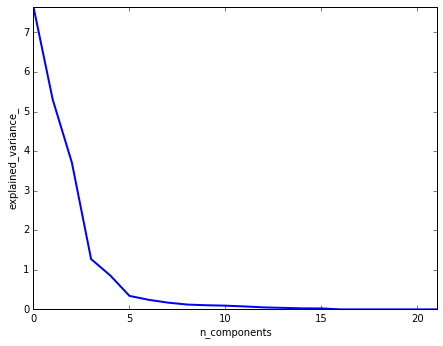

In [4]:
homeTatics = trainTest[:,[3,4,5,6,7,8,9,10,11,12,13,25,26,27,28,29,30,31,32,33,34,35]]
plotPCASpectrum(homeTatics)

#### Plot PCA Expectrum for team rating (One Team)

[  1.85755823e+02   1.48917275e+02   1.11396385e+02   1.02658974e+02
   7.04185612e+01   6.44343751e+01   5.78737248e+01   4.37716476e+01
   2.75329339e+01   1.10380279e-01   3.22883893e-02   1.85591068e-02]


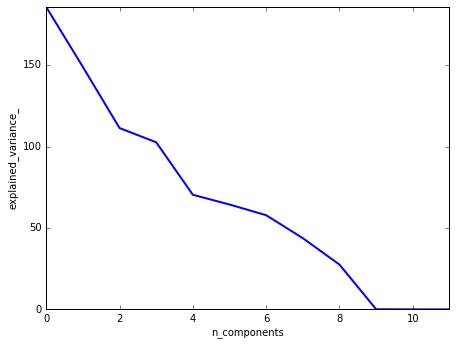

In [5]:
homeRateTeam = trainTest[:,[47,48,49,50,51,52,53,54,55,56,57,58]]
plotPCASpectrum(homeRateTeam)

#### Plot PCA Expectrum for one Player

[  7.64066876e+00   5.30496114e+00   3.70780120e+00   1.27221948e+00
   8.56592159e-01   3.41060275e-01   2.42215638e-01   1.70859128e-01
   1.22391293e-01   1.04935138e-01   9.43145871e-02   7.45149166e-02
   5.06109423e-02   3.91375625e-02   2.64593511e-02   2.45867886e-02
   1.02656144e-29   5.19113263e-34   3.08675855e-34   4.96456718e-35
   6.19663900e-37   0.00000000e+00]


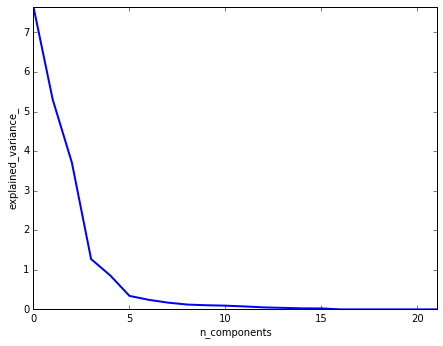

In [6]:
homeRateTeam = trainTest[:,[3,4,5,6,7,8,9,10,11,12,13,25,26,27,28,29,30,31,32,33,34,35]]
plotPCASpectrum(homeRateTeam)

#### Plot PCA Expectrum for all Collumn

[  5.99391744e+08   5.75500362e+08   9.79938285e+03   7.07297021e+03
   3.22545321e+03   2.58768311e+03   2.13718840e+03   1.65280262e+03
   1.49577015e+03   1.42906151e+03   1.36610097e+03   1.18487295e+03
   1.17343259e+03   1.15430709e+03   1.07208490e+03   1.00876933e+03
   1.00216303e+03   9.65994809e+02   9.51223344e+02   9.14552983e+02
   8.72354967e+02   8.36274680e+02   7.79309907e+02   7.51911040e+02
   7.29809826e+02   6.78034121e+02   6.23348086e+02   5.72292240e+02
   5.56089107e+02   5.52897641e+02   5.39974439e+02   5.36417486e+02
   5.20641818e+02   5.14577311e+02   5.02606136e+02   4.97868084e+02
   4.82117482e+02   4.64585352e+02   4.58614706e+02   4.37180669e+02
   4.32433377e+02   4.14599355e+02   3.96568168e+02   3.91230348e+02
   3.75371872e+02   3.61905731e+02   3.49751823e+02   3.43638663e+02
   3.29663059e+02   3.25351067e+02   3.14038702e+02   3.13341702e+02
   3.07531119e+02   3.01256361e+02   2.97170576e+02   2.94648536e+02
   2.92147123e+02   2.86817095e+02

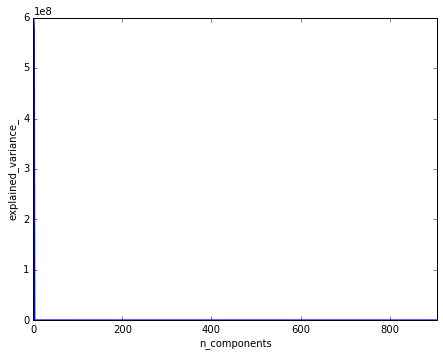

In [7]:
plotPCASpectrum(trainTest[:,:907])

#### Reducing Dimensionality for Tatics

In [8]:
homeTatics = trainTest[:,[3,4,5,6,7,8,9,10,11,12,13,25,26,27,28,29,30,31,32,33,34,35]]
awayTatics = trainTest[:,[14,15,16,17,18,19,20,21,22,23,24,36,37,38,39,40,41,42,43,44,45,46]]

pca = decomposition.PCA(n_components=5)
homeTaticspreprocessed = pca.fit_transform(homeTatics)

pca = decomposition.PCA(n_components=5)
awayTaticspreprocessed = pca.fit_transform(awayTatics)

#### Reducing Dimensionality for team ratings

In [9]:
homeRateTeam = trainTest[:,[47,48,49,50,51,52,53,54,55,56,57,58]]
awayRateTeam = trainTest[:,[59,60,61,62,63,64,65,66,67,68,69,70]]

pca = decomposition.PCA(n_components=6)
homeRateTeamPreprocessed = pca.fit_transform(homeRateTeam)

pca = decomposition.PCA(n_components=6)
awayRateTeampreprocessed = pca.fit_transform(awayRateTeam)

#### Reducing Dimensionality for players

In [10]:
xTatics = trainTest[:,[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46]]

playersRD = [decomposition.PCA(n_components=9).fit_transform(np.concatenate((trainTest[:,range(71+(pos*38),71+((pos+1)*38))],xTatics[:,[pos,pos+22]]),axis=1)) for pos in range(22)]




#### Maximize sparse teams

In [11]:
enc = preprocessing.OneHotEncoder()
enc.fit(trainTest[:,[0]])
teamsH = enc.transform(trainTest[:,[0]]) 
teamsA = enc.transform(trainTest[:,[1]]) 
teams = (teamsH + teamsA).toarray()

#### Concatenate inputs

In [21]:
date = trainTest[:,[2]]
inputs = np.concatenate((homeRateTeamPreprocessed,awayRateTeampreprocessed), axis=1)

for playerRD in playersRD:
    inputs = np.concatenate((inputs,playerRD), axis=1)



#### Scaling inputs

In [22]:
inputs = StandardScaler().fit_transform(inputs)

#### Input Version PCA for every collumn 

In [14]:
pca = decomposition.PCA(n_components=5)
inputsPCA = pca.fit_transform(np.concatenate((trainTest[:,:907],teams),axis=1))
inputsPCA = StandardScaler().fit_transform(inputsPCA)

## Classification 

#### Using KFold with Naive Bayes

Naive Bayes: = Score:3.36e-01[+/- 2.24e-02]


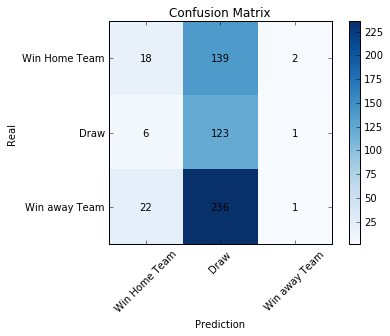

In [15]:
resultSVM = KFoldNB(inputs,outputs)

gnb = GaussianNB()
np.mean(cross_val_score(gnb, inputs, outputs, scoring='accuracy', cv=10))
holdoutPlotConfusionMatrix(gnb,inputs,outputs)

#### Using KFold with SVM (PCA for every collumn )

0.497470603034


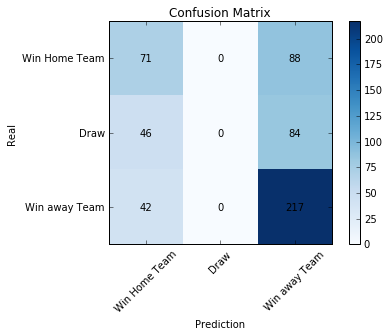

In [16]:
clf = svm.SVC()
print(np.mean(cross_val_score(clf,inputsPCA,outputs,cv=10)))
holdoutPlotConfusionMatrix(clf,inputsPCA,outputs)

#### Using KFold with SVM 

0.486554856979


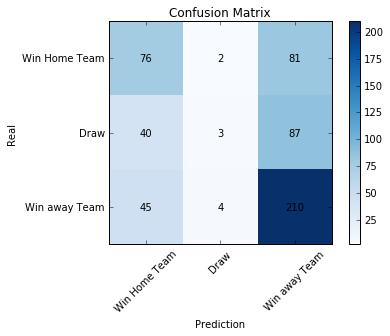

In [23]:
clf = svm.SVC()
print(np.mean(cross_val_score(clf,inputs,outputs,cv=10)))
holdoutPlotConfusionMatrix(clf,inputs,outputs)

#### Using KFold with Logistic Regression

0.422737154823


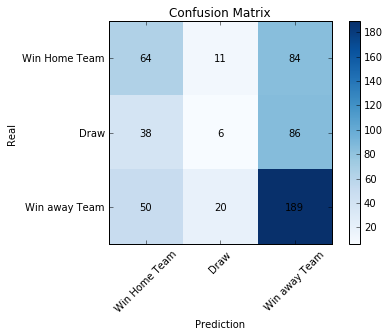

In [18]:
clf = LogisticRegression(penalty='l1')
print(np.mean(cross_val_score(clf,inputs,outputs,cv=10)))
holdoutPlotConfusionMatrix(clf,inputs,outputs)

#### Using KFold with KNeighborsClassifier

0.393551707452


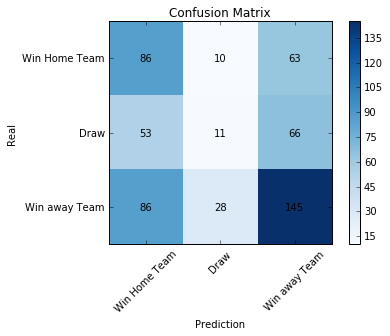

In [19]:
clf = KNeighborsClassifier(n_neighbors=15)
print(np.mean(cross_val_score(clf,inputs,outputs,cv=10)))
holdoutPlotConfusionMatrix(clf,inputs,outputs)

#### Using SVM - Regression for predict number of goals before predict winning team

In [20]:
clf = svm.SVR()
KFoldRC(clf,inputs,outputsR)

[ 1.91339409  1.51871625  1.73725501  1.89720982  0.98745639]
[ 1.61608001  1.44923542  1.24887728  1.01678982  0.805355  ]
[ 2.22022875  1.226461    1.33272612  1.09625121  2.1589776 ]
[ 0.78149172  1.04018298  1.28586635  1.64200844  0.9816735 ]
[ 2.28701396  2.68704671  1.5855462   1.48964738  1.18224953]
[ 0.79406469  0.92915314  1.48774707  1.46740398  1.28161175]
[ 1.04334508  1.28597376  0.78570104  1.401281    0.9887328 ]
[ 1.24989114  1.11877336  1.32432705  0.99930864  0.99412369]
[ 2.03603438  1.87408039  2.09183561  0.69153759  2.03180852]
[ 0.85398534  1.01048308  1.07765591  1.18227342  0.81762704]
[ 1.43225815  1.2210232   1.47115251  1.79510016  1.8492274 ]
[ 0.74580642  1.24944506  1.30175274  1.15888646  1.3622068 ]
[ 1.9513958   0.7069308   1.38018106  1.5973827   1.23072182]
[ 0.25172396  1.35238548  1.23283989  1.15134634  1.44132762]
[ 1.32566764  1.06890976  1.72398213  2.07414806  1.66446025]
[ 1.51262761  0.74668485  1.31227696  0.81829741  0.42352506]
[ 0.5088

0.50785273121039531